# Importing Libraries


In [40]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.constraints import MaxNorm
from sklearn.model_selection import train_test_split
from keras.utils import np_utils
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

In [42]:
print(f'There are {len(x_train)} for Training')
print(f'There are {len(x_test)} for testing')

There are 50000 for Training
There are 10000 for testing


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


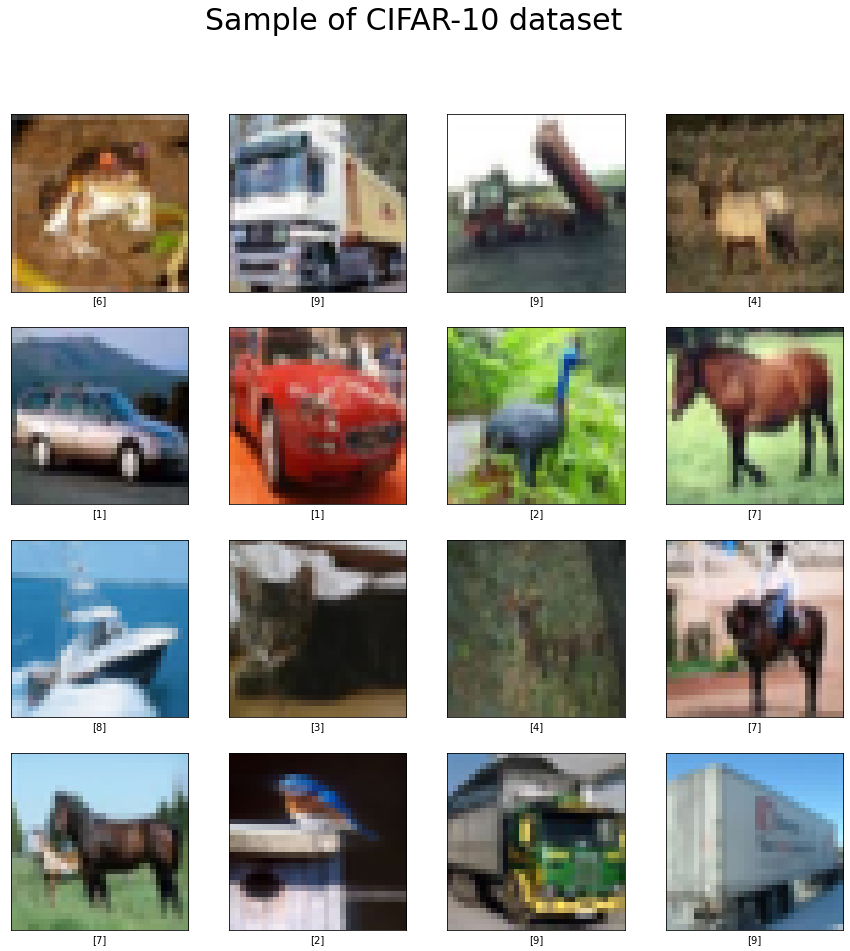

In [43]:
plt.figure(figsize=(15,15))
plt.suptitle('Sample of CIFAR-10 dataset',fontsize=30)
n=16
for i in range(n):
  plt.subplot(4,4,i+1)
  plt.imshow(x_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.xlabel(y_train[i])
plt.show()

In [44]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# Normalize Pixels of images 
x_train=x_train/255
x_test=x_test/255

In [45]:
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)

num_classes=y_test.shape[1]
num_classes

10

In [46]:
print('Train Images shape is        : ',x_train.shape)
print('Testing Images  shape is : ',x_test.shape)

Train Images shape is        :  (50000, 32, 32, 3)
Testing Images  shape is :  (10000, 32, 32, 3)


**Create CNN Model**

In [47]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3),padding='same',kernel_constraint=MaxNorm(3)))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3),activation='relu',padding='same',kernel_constraint=MaxNorm(3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(512,activation='relu',kernel_constraint=MaxNorm(3)))

model.add(Dropout(0.5))

model.add(Dense(num_classes,activation='softmax'))


In [48]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_2 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               4194816   
                                                      

In [49]:
sgd=SGD(learning_rate=0.01,momentum=0.9)
model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

**Train The Model**

In [50]:
histroy=model.fit(x_train,y_train,batch_size=50,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
1000/1000 [==============================] - 9s 8ms/step - loss: 1.7315 - accuracy: 0.3730 - val_loss: 1.4492 - val_accuracy: 0.4775
Epoch 2/20
1000/1000 [==============================] - 9s 9ms/step - loss: 1.3881 - accuracy: 0.5035 - val_loss: 1.1973 - val_accuracy: 0.5745
Epoch 3/20
1000/1000 [==============================] - 9s 9ms/step - loss: 1.1933 - accuracy: 0.5756 - val_loss: 1.0956 - val_accuracy: 0.6096
Epoch 4/20
1000/1000 [==============================] - 7s 7ms/step - loss: 1.0545 - accuracy: 0.6279 - val_loss: 1.0032 - val_accuracy: 0.6468
Epoch 5/20
1000/1000 [==============================] - 7s 7ms/step - loss: 0.9362 - accuracy: 0.6688 - val_loss: 1.0147 - val_accuracy: 0.6456
Epoch 6/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.8408 - accuracy: 0.7002 - val_loss: 0.9503 - val_accuracy: 0.6711
Epoch 7/20
1000/1000 [==============================] - 8s 8ms/step - loss: 0.7489 - accuracy: 0.7344 - val_loss: 0.9246 - val_accuracy:

In [51]:
score, acc = model.evaluate(x_test,y_test,batch_size=32)                       
print('Test score:', score)
print('Test accuracy:', acc)

313/313 [==============================] - 2s 7ms/step - loss: 1.2758 - accuracy: 0.6927
Test score: 1.2757501602172852
Test accuracy: 0.6927000284194946


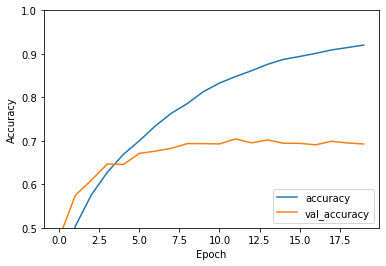

In [52]:
plt.plot(histroy.history['accuracy'], label='accuracy')
plt.plot(histroy.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

In [53]:
model.save('CIFAR_Model.h5')